<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_Feb_14_PR_ROC_curve_and_KMeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

## moons, circles and linear separable

In [0]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# random_state = np.random.RandomState(0)
random_state = 0

(1000, 2)


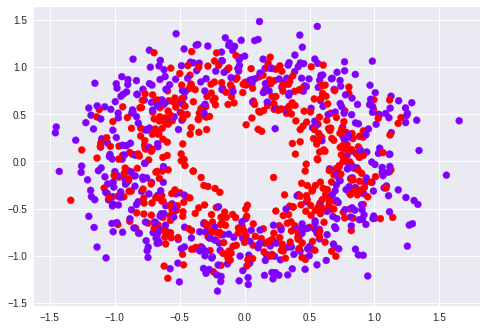

In [105]:
# X, y = make_moons(n_samples=1000, noise=0.2,
#                     random_state=random_state)
X, y = make_circles(n_samples=1000, noise=0.2,
                    random_state=random_state)

print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [106]:
# {y_val for y_val in y}
# {y}    Doesn't work - unhashable type
set(y)

{0, 1}

In [107]:
# No. of data points in class 1
sum(y)

500

# Apply Classifier

## fit and predict

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

In [110]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
y_test[: 5]

array([1, 1, 0, 0, 0])

In [112]:
# y_pred_proba[: 5].sum(axis=1)    # = 1
y_pred_proba[: 5, 1]

array([0.48407898, 0.49240621, 0.49989376, 0.50637128, 0.50311719])

In [0]:
y_pred_proba = y_pred_proba[:, 1]

## plot

In [0]:
import matplotlib.pyplot as plt

In [115]:
# make mesh
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 0].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx.shape, xx

((177, 186), array([[-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915],
        [-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915],
        [-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915],
        ...,
        [-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915],
        [-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915],
        [-1.75666085, -1.73666085, -1.71666085, ...,  1.90333915,
          1.92333915,  1.94333915]]))

In [116]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
Z.shape, Z

((177, 186),
 array([[0.50686952, 0.50706151, 0.50725349, ..., 0.54191201, 0.54210268,
         0.54229333],
        [0.50652103, 0.50671302, 0.50690501, ..., 0.54156589, 0.54175658,
         0.54194726],
        [0.50617254, 0.50636453, 0.50655653, ..., 0.54121972, 0.54141044,
         0.54160114],
        ...,
        [0.44642863, 0.44661846, 0.44680831, ..., 0.48137148, 0.48156324,
         0.48175501],
        [0.44608411, 0.44627391, 0.44646373, ..., 0.48102342, 0.48121518,
         0.48140693],
        [0.44573964, 0.44592941, 0.4461192 , ..., 0.48067539, 0.48086713,
         0.48105887]]))

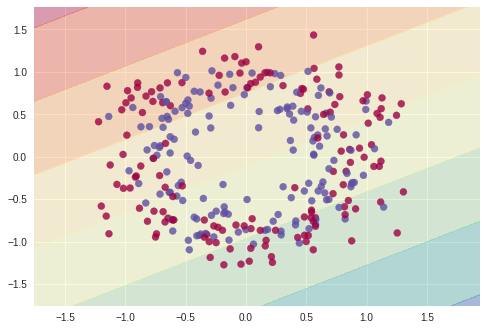

In [117]:
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral, alpha=0.8)

# Plot Precision-Recall curve

In [0]:
from sklearn.metrics import precision_recall_curve

In [119]:
precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_pred_proba)
precision.shape, recall.shape, precision, recall

((296,),
 (296,),
 array([0.52542373, 0.52380952, 0.52559727, 0.52739726, 0.52920962,
        0.53103448, 0.53287197, 0.53125   , 0.53310105, 0.53496503,
        0.53684211, 0.53873239, 0.53710247, 0.53900709, 0.54092527,
        0.54285714, 0.54480287, 0.54676259, 0.54512635, 0.54347826,
        0.54181818, 0.54379562, 0.54578755, 0.54779412, 0.54612546,
        0.54814815, 0.5464684 , 0.54850746, 0.54681648, 0.54511278,
        0.54716981, 0.54545455, 0.54372624, 0.54198473, 0.5440613 ,
        0.54230769, 0.54440154, 0.54263566, 0.54474708, 0.54296875,
        0.54509804, 0.54330709, 0.54545455, 0.54365079, 0.54183267,
        0.544     , 0.54216867, 0.54032258, 0.53846154, 0.54065041,
        0.53877551, 0.53688525, 0.53909465, 0.53719008, 0.53526971,
        0.5375    , 0.53556485, 0.53781513, 0.53586498, 0.53389831,
        0.53191489, 0.52991453, 0.53218884, 0.53017241, 0.52813853,
        0.52608696, 0.52401747, 0.52631579, 0.52422907, 0.52654867,
        0.52888889, 0.53125   

Text(0, 0.5, 'Precision')

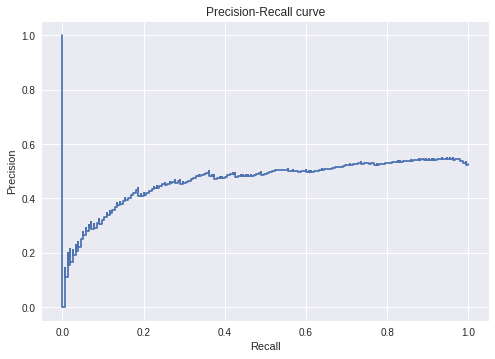

In [120]:
plt.step(recall, precision)

plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

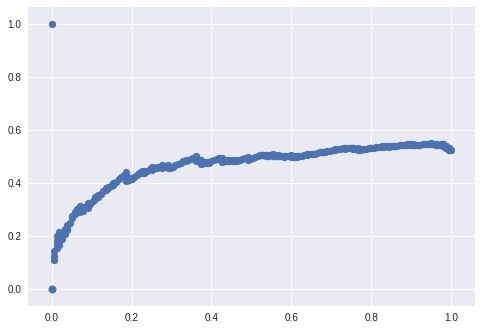

In [121]:
plt.scatter(recall, precision)

# Plot ROC curve

In [0]:
from sklearn.metrics import roc_curve, auc

In [123]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba)
fpr.shape, tpr.shape, thresholds.shape, fpr, tpr, thresholds

((161,),
 (161,),
 (161,),
 array([0.        , 0.00689655, 0.04137931, 0.04137931, 0.05517241,
        0.05517241, 0.07586207, 0.07586207, 0.10344828, 0.10344828,
        0.11724138, 0.11724138, 0.13103448, 0.13103448, 0.14482759,
        0.14482759, 0.15172414, 0.15172414, 0.15862069, 0.15862069,
        0.16551724, 0.16551724, 0.1862069 , 0.1862069 , 0.2       ,
        0.2       , 0.22068966, 0.22068966, 0.22758621, 0.22758621,
        0.23448276, 0.23448276, 0.24137931, 0.24137931, 0.24827586,
        0.24827586, 0.25517241, 0.25517241, 0.28965517, 0.28965517,
        0.29655172, 0.29655172, 0.30344828, 0.30344828, 0.31034483,
        0.31034483, 0.31724138, 0.31724138, 0.33103448, 0.33103448,
        0.33793103, 0.33793103, 0.35172414, 0.35172414, 0.37241379,
        0.37241379, 0.37931034, 0.37931034, 0.3862069 , 0.3862069 ,
        0.4137931 , 0.4137931 , 0.42068966, 0.42068966, 0.44827586,
        0.44827586, 0.45517241, 0.45517241, 0.46206897, 0.46206897,
        0.46896552, 0

In [124]:
area_under_curve = auc(fpr, tpr)
area_under_curve

0.4764849833147943

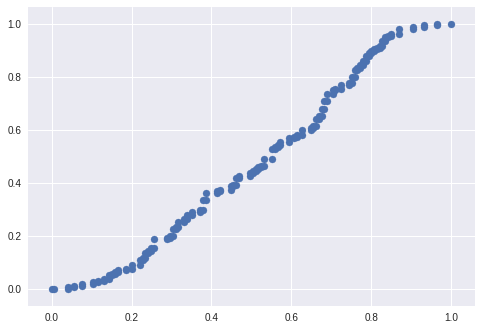

In [125]:
plt.scatter(fpr, tpr)

Text(0, 0.5, 'TPR')

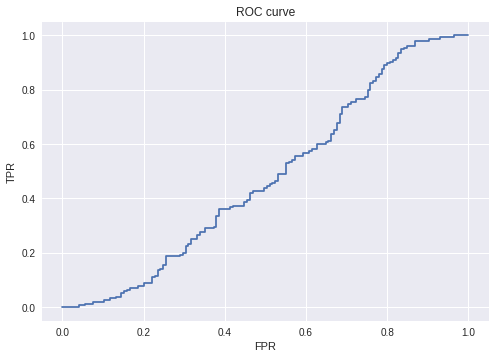

In [126]:
# plt.plot(fpr, tpr)
plt.step(fpr, tpr)

plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

# PCA

In [0]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [128]:
X, y = make_classification(n_classes=2,
                           random_state=random_state)
X.shape, y.shape, X, y

((100, 20),
 (100,),
 array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
          1.02122474, -0.46931074],
        [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
          0.62251914, -1.49026539],
        [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
         -0.10169727, -0.45130304],
        ...,
        [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
          2.01406015,  0.69042902],
        [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
          0.11273794,  1.20985013],
        [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
         -1.31771734,  1.61805427]]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]))

In [129]:
pca = PCA(n_components=2)

X_new = pca.fit_transform(X)
X_new.shape, X_new[: 5]

((100, 2), array([[-0.06210507, -3.41146034],
        [-0.55062707, -2.20263008],
        [ 0.38412213, -0.00970061],
        [ 0.33390556,  0.62000907],
        [-1.65031529,  0.51948707]]))

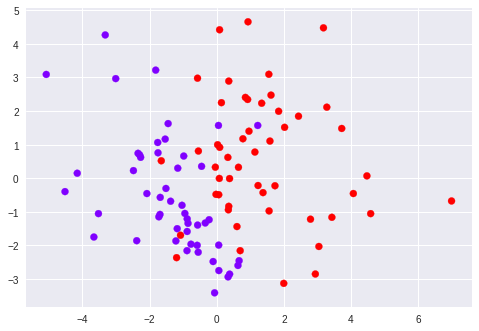

In [130]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.rainbow)

In [131]:
pca.components_

array([[-0.05366886, -0.09769187,  0.02502436,  0.57983039,  0.63735144,
        -0.05819881, -0.04792342,  0.01767019,  0.00125253,  0.08181737,
         0.33845721,  0.02399506, -0.009296  ,  0.0582507 , -0.04106441,
         0.0339144 ,  0.05261286,  0.32313129, -0.01164064,  0.0554565 ],
       [ 0.08471638, -0.15880379, -0.05034421,  0.33244878, -0.32332901,
         0.07673474, -0.05736229,  0.04032915, -0.05519551, -0.05786754,
         0.60532897, -0.07994312, -0.05667302, -0.01981437, -0.05881742,
        -0.04063665, -0.09794522, -0.58117761, -0.0550544 , -0.02974609]])

# K-Means

## make_blobs

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [0]:
CMAP = ListedColormap(['purple', 'blue', 'green', 'yellow', 'orange', 'red'])

In [134]:
X, y = make_blobs(n_samples=500, centers=6, cluster_std=1.4,
                  random_state=random_state)
X.shape

(500, 2)

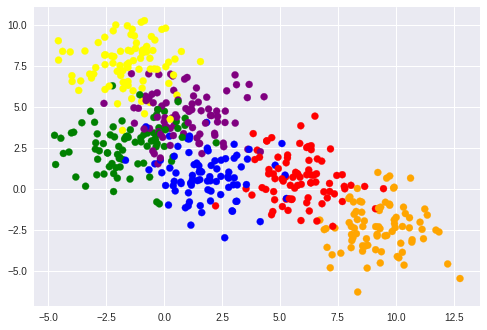

In [135]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP)

In [136]:
km_clf = KMeans(n_clusters=6)
y_pred = km_clf.fit_predict(X)
y_pred

array([1, 4, 2, 5, 2, 0, 3, 3, 4, 0, 1, 2, 2, 3, 3, 3, 1, 1, 4, 3, 5, 3,
       2, 5, 2, 3, 2, 0, 1, 4, 5, 3, 2, 4, 4, 2, 1, 4, 4, 3, 4, 1, 4, 0,
       1, 4, 5, 1, 5, 4, 1, 4, 2, 4, 2, 4, 0, 0, 1, 4, 2, 5, 1, 4, 0, 3,
       0, 3, 4, 0, 4, 0, 3, 2, 0, 0, 1, 2, 1, 1, 5, 5, 1, 5, 0, 3, 3, 1,
       0, 1, 3, 3, 2, 5, 0, 5, 2, 2, 0, 1, 2, 3, 3, 4, 4, 4, 2, 1, 1, 5,
       5, 0, 4, 5, 5, 5, 4, 5, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 3, 1, 4, 5,
       5, 3, 4, 3, 1, 4, 5, 5, 5, 3, 0, 5, 1, 1, 0, 4, 5, 3, 2, 5, 2, 3,
       3, 1, 0, 0, 4, 3, 3, 1, 1, 0, 5, 2, 2, 4, 4, 0, 3, 1, 2, 2, 5, 5,
       2, 5, 1, 2, 5, 3, 2, 4, 2, 1, 5, 3, 1, 3, 4, 1, 1, 2, 0, 3, 2, 0,
       1, 1, 5, 5, 5, 4, 2, 3, 1, 1, 4, 2, 5, 0, 3, 5, 1, 3, 1, 0, 1, 2,
       3, 5, 3, 3, 2, 2, 5, 5, 3, 0, 2, 1, 2, 4, 5, 3, 1, 1, 0, 1, 5, 1,
       3, 4, 0, 2, 5, 4, 4, 5, 1, 0, 3, 5, 3, 3, 4, 3, 2, 3, 2, 1, 2, 2,
       3, 5, 3, 0, 4, 0, 0, 3, 3, 2, 0, 4, 1, 0, 2, 0, 5, 1, 2, 0, 4, 0,
       3, 0, 2, 0, 1, 1, 0, 4, 3, 4, 0, 5, 1, 3, 2,

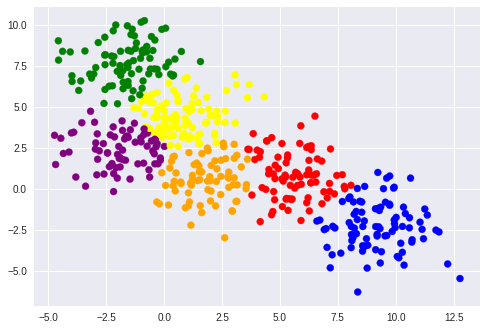

In [137]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=CMAP)

## make_classification (1)
n_clusters_per_class = 2

In [0]:
from sklearn.datasets import make_classification

In [139]:
X, y = make_classification(n_samples=100, n_classes=2, n_clusters_per_class=2,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=random_state+8)
X.shape, y.shape, X[: 5], set(y)

((100, 2), (100,), array([[-2.45524738,  3.03837936],
        [-0.23480932, -1.81197227],
        [ 0.33385686, -0.41410363],
        [-0.14473651,  1.3512075 ],
        [ 1.5434767 , -1.52400592]]), {0, 1})

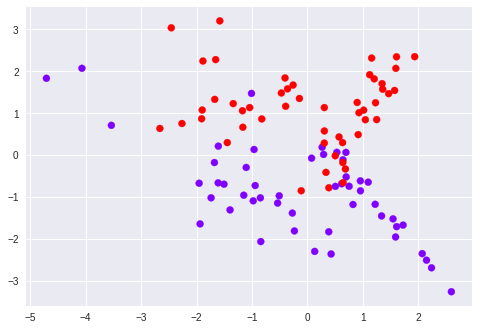

In [140]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [141]:
y_pred = KMeans(n_clusters=4).fit_predict(X)
y_pred.shape, set(y_pred)

((100,), {0, 1, 2, 3})

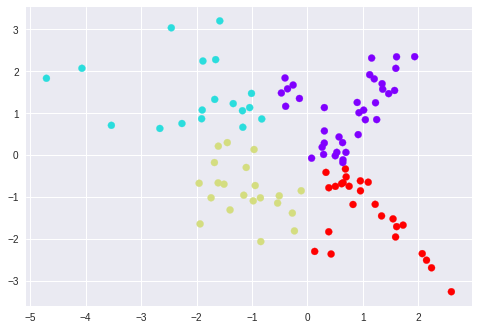

In [142]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.rainbow)

### Rotate the data

In [0]:
from scipy.ndimage import rotate

In [144]:
X_rot = rotate(X, angle=90)
X_rot.shape, X_rot

((2, 100),
 array([[ 3.03837936, -1.81197227, -0.41410363,  1.3512075 , -1.52400592,
         -0.33249613, -0.6160625 ,  1.46656535,  1.47196676,  1.5812912 ,
         -0.29627109,  1.48221176,  0.5756229 ,  1.16400888,  2.07035668,
          0.75312911, -0.11440453,  3.20358585,  1.07481422,  0.18689387,
          2.34958876,  1.54242081, -1.67323798, -0.52193992,  0.84403278,
          0.43240248, -0.68522081, -2.06628017, -0.85228459,  1.84083217,
         -1.31043364,  0.29761702, -3.26386112,  0.0651761 ,  1.13368217,
          0.28611257,  2.07163149, -0.7809528 ,  2.27921729,  2.31625834,
         -0.17894457,  0.13257397, -1.70933974,  1.67231087,  1.81898799,
         -0.67316894, -0.6957566 , -1.17641617, -0.97319113,  2.34565974,
          0.48810404, -0.72782043,  1.83311927,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.  

In [0]:
# plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y, cmap=plt.cm.rainbow)

## make_classification (2)
n_clusters_per_class = 1

In [0]:
X, y = make_classification(n_samples=100, n_classes=2, n_clusters_per_class=1,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=random_state+18)

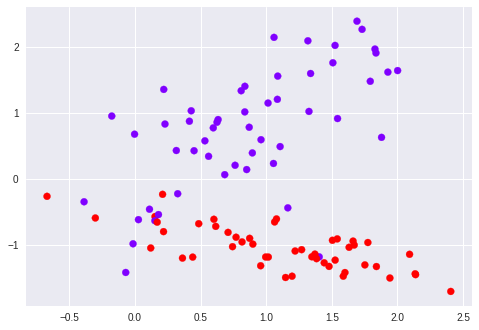

In [147]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [0]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

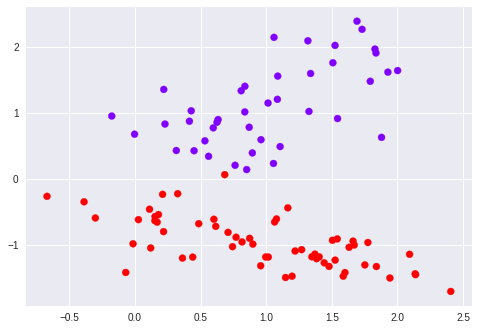

In [149]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.rainbow)